# mrbles pipeline example

## Load necessary modules

In [1]:
import os
import importlib
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import mrbles

# For fancy interactive Plotly graphs
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tools
from plotly.tools import FigureFactory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # For plotly offline mode
# Set plotly to notebook mode
init_notebook_mode(connected=True)
py.sign_in('bjornharink_stanford', 'VqISgcHFwPkY0z50PG47')

Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


In [98]:
importlib.reload(mrbles)
importlib.reload(mrbles.data)
importlib.reload(mrbles.core)
importlib.reload(mrbles.pipeline)
importlib.reload(mrbles)

Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford
Copyright 2017 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford


<module 'mrbles' from 'G:\\My Drive\\[Stanford]\\DEV\\Encoded Beads Project\\Bead Analysis\\mrbles\\__init__.py'>

## Load image set

The dictionary keys of image folders and image pattersn must match.
The instatiatiation of the object will search for the files. An error is thrown if no images are found.

In [3]:
image_folders = {
    "mrbles-test-set": r"../data",
    "mrbles-test-set-2": r"../data",
}
image_patterns = {
    "mrbles-test-set": r"peptide_biotin_streptavidin_([0-9][0-9])_MMStack_Pos0.ome.tif",
    "mrbles-test-set-2": r"peptide_biotin_streptavidin_([0-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(90, 990)
mrbles_images.crop_y = slice(90, 990)

In [4]:
image_folder = r"C:\DATA\Huy"
image_folders = {"50 nM" : r"C:\DATA\Huy", 
                 "100 nM" : r"C:\DATA\Huy",
                 "250 nM" : "C:\DATA\Huy",
                 "500 nM" : r"C:\DATA\Huy",
                 "1000 nM" : r"C:\DATA\Huy"
}
image_patterns = {"50 nM" : r"20170726_HQN_CN_PxI2_1Step_50nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
                  "100 nM" : r"20170726_HQN_CN_PxI2_1Step_100nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "250 nM" : "20170726_HQN_CN_PxI2_1Step_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "500 nM" : r"20170726_HQN_CN_PxI2_1Step_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "1000 nM" : r"20170726_HQN_CN_PxI2_1Step_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(90, 990)
mrbles_images.crop_y = slice(90, 990)

In [2]:
image_folders = {"63 nM" : r"C:\DATA\Huy\20180111 CN", 
                 "125 nM" : r"C:\DATA\Huy\20180111 CN",
                 "250 nM" : r"C:\DATA\Huy\20180111 CN",
                 "500 nM" : r"C:\DATA\Huy\20180111 CN",
                 "1000 nM" : r"C:\DATA\Huy\20180111 CN",
                 "2000 nM" : r"C:\DATA\Huy\20180111 CN",
                 "Biotin" : r"C:\DATA\Huy\20180111 CN",
                 "NIR" : r"C:\DATA\Huy\20180111 CN"
}
image_patterns = {"63 nM" : r"20180111_CN_Final_Normal_p49_63nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif", 
                  "125 nM" : r"20180111_CN_Final_Normal_p49_125nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "250 nM" : "20180111_CN_Final_Normal_p49_250nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "500 nM" : r"20180111_CN_Final_Normal_p49_500nM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "1000 nM" : r"20180111_CN_Final_Normal_p49_1uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "2000 nM" : r"20180111_CN_Final_Normal_p49_2uM_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "Biotin" : r"20180111_CN_Final_Normal_biotinb_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif",
                  "NIR" : r"20180111_CN_Final_Normal_nir_([1-9]|[1-9][0-9])_MMStack_Pos0.ome.tif"
}
mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
mrbles_images.crop_x = slice(90, 990)
mrbles_images.crop_y = slice(90, 990)

In [7]:
# image_folders = {
#     "mrbles-test-set": r"Z:\Data\Setup 1\Alex\96codes_20171205made_20171213image\96codes_allchannels_imaging_20171213",
#     "mrbles-test-set-2": r"Z:\Data\Setup 1\Alex\96codes_20171205made_20171213image\96codes_allchannels_imaging_20171213",
# }
# image_patterns = {
#     "mrbles-test-set": r"96codes20171205_([0-9][0-9])_MMStack_Pos0.ome.tif",
#     "mrbles-test-set-2": r"96codes20171205_([0-9][0-9])_MMStack_Pos0.ome.tif"
# }
# mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)
# mrbles_images.crop_x = slice(90, 990)
# mrbles_images.crop_y = slice(90, 990)

If no error was thrown the images can be loaded into memory.

In [3]:
mrbles_images.load()
mrbles_images.rename_channel('Cy5-E 10%', 'Cy5')

By calling the object the Xarray content is displayed.

The internal Xarray DataArray can be sliced using Xarray syntax (similar to Pandas).
```python
mrbles_images['set name', file number, 'channel name', y-slice, x-slice]
```

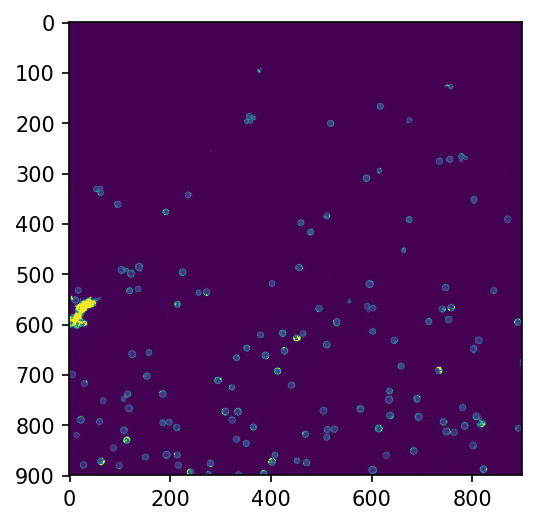

In [5]:
plt.figure(dpi=150)
plt.imshow(mrbles_images['Biotin', 20, 'Cy5']);

## Find MRBLEs in images

Instatiate a MBRLEs finding object, giving initial bead_size (pixels), which must be set. More fine-tune settings can be set by calling object.settings.area_max etc. Otherwise, default settings are used.

In [7]:
find_mrbles = mrbles.Find(bead_size=15, border_clear=True, circle_size=350)
find_mrbles.settings.eccen_max = 0.65

In [8]:
mrbles_images_combined = find_mrbles.find(mrbles_images[:, : , 'Brightfield'], combine_data=mrbles_images)

In [17]:
find_mrbles.beads_total

11108

In [18]:
find_mrbles.beads_per_set

{'1000 nM': 1333,
 '125 nM': 905,
 '2000 nM': 1120,
 '250 nM': 1203,
 '500 nM': 1313,
 '63 nM': 1220,
 'Biotin': 3169,
 'NIR': 845}

In [19]:
find_mrbles.bead_dims.radius.mean()*2

14.411523013769639

In [24]:
#find_mrbles.inspect()

## Create Reference spectra

In [25]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": r"C:\DATA\20170406 - Reference files - KARA",
    "Sm": r"C:\DATA\20170406 - Reference files - KARA",
    "Tm": r"C:\DATA\20170406 - Reference files - KARA",
    "Eu": r"C:\DATA\20170406 - Reference files - KARA",
    "bkg": r"C:\DATA\20170406 - Reference files - KARA"
}
REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "20170320_blank_1_MMStack_Pos0.ome.tif"
}

In [26]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS)
spec_object.crop_x = slice(312, 712)
spec_object.crop_y = slice(312, 712)

In [27]:
spec_object.load()

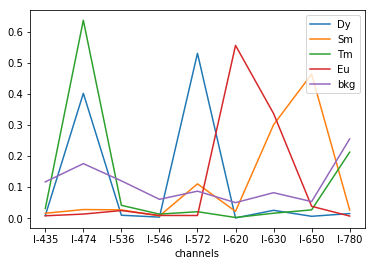

In [28]:
spec_object.plot()

## Spectral unmixing and get ratios

In [29]:
ratio_images = mrbles.Ratio(spec_object)

In [30]:
mrbles_images_combined = ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu', combine_data=mrbles_images_combined)

In [32]:
mrbles_images_combined

{'63 nM': <xarray.DataArray (f: 24, c: 25, y: 900, x: 900)>
array([[[[ 168., ...,  159.],
         ..., 
         [ 146., ...,  137.]],

        ..., 
        [[   0., ...,    0.],
         ..., 
         [   0., ...,    0.]]],


       ..., 
       [[[ 147., ...,  164.],
         ..., 
         [ 142., ...,  152.]],

        ..., 
        [[   0., ...,    0.],
         ..., 
         [   0., ...,    0.]]]])
Coordinates:
  * c        (c) object 'Brightfield' 'Cy5' 'Dy' 'Dy_ratio' 'Eu' 'Sm' ...
Dimensions without coordinates: f, y, x, '125 nM': <xarray.DataArray (f: 28, c: 25, y: 900, x: 900)>
array([[[[ 151., ...,  155.],
         ..., 
         [ 163., ...,  127.]],

        ..., 
        [[   0., ...,    0.],
         ..., 
         [   0., ...,    0.]]],


       ..., 
       [[[ 151., ...,  154.],
         ..., 
         [ 144., ...,  143.]],

        ..., 
        [[   0., ...,    0.],
         ..., 
         [   0., ...,    0.]]]])
Coordinates:
  * c        (c) object 'Brightfiel

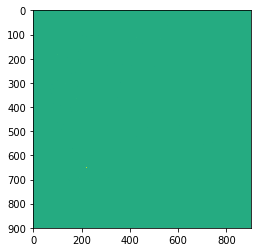

In [34]:
plt.figure()
plt.imshow(mrbles_images_combined['1000 nM', 0, 'Dy_ratio'])

In [36]:
mrbles_images_combined['Biotin'].c

<xarray.DataArray 'c' (c: 25)>
array(['Brightfield', 'Cy5', 'Dy', 'Dy_ratio', 'Eu', 'Sm', 'Sm_ratio', 'Tm',
       'Tm_ratio', 'bkg', 'l-435', 'l-474', 'l-536', 'l-546', 'l-572', 'l-620',
       'l-630', 'l-650', 'l-780', 'mask_bkg', 'mask_check', 'mask_full',
       'mask_inside', 'mask_outside', 'mask_ring'], dtype=object)
Coordinates:
  * c        (c) object 'Brightfield' 'Cy5' 'Dy' 'Dy_ratio' 'Eu' 'Sm' ...

## Extract data from each MRBLE

In [99]:
extract_data = mrbles.Extract()

In [38]:
#images = mrbles_images_masks_ratios[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5']]

In [88]:
masks = mrbles_images_combined['Biotin', 0, ['mask_inside']]

In [97]:
masks[masks.dims[0]].values

array(['mask_inside'], dtype=object)

In [246]:
test1 = extract_data._get_index(mrbles_images_masks_ratios['50 nM', 12, ['mask_bkg']])
test2 = extract_data._get_index(mrbles_images_masks_ratios['50 nM', 12, ['mask_ring']])

In [251]:
def diff(first, second):
    second = set(second)
    return [item for item in first if item not in second]

In [255]:
diff(test2, test1)

[21.0, 36.0, 45.0, 56.0, 67.0, 89.0]

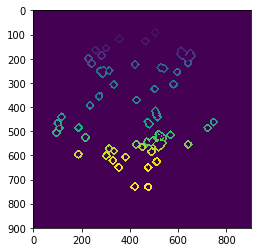

In [39]:
plt.figure()
plt.imshow(mrbles_images_combined['63 nM', 12, 'mask_bkg'])

In [100]:
extract_data.get(mrbles_images_combined[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5']], 
                 mrbles_images_combined[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']])

In [166]:
extract_data.data.loc['125 nM']

Cy5.mask_bkg  Cy5.mask_full  Cy5.mask_inside  Cy5.mask_lbl  \
0  0         1167.0         2124.0           2058.0           3.0   
   1         1132.0         1489.5           1471.5           4.0   
   2         1176.0         2803.0           2760.0           5.0   
   3         1057.0          979.0            985.0           6.0   
   4         1053.0          969.0            982.0           7.0   
   5         1028.0          982.0            991.5           8.0   
   6         1029.5          963.0            972.0           9.0   
   7         1019.0         1513.0           1503.0          10.0   
   8         1038.0         1501.0           1464.0          11.0   
   9         1083.0         1503.0           1454.0          12.0   
   10        1040.0         1673.0           1592.0          13.0   
1  0         1138.0         1073.0           1093.0           3.0   
   1         1157.0         1387.0           1472.5           5.0   
   2         1014.0         1168.0           1234.0           7.0   
   3         1058.0         3734.0           3526.5           8.0   
   4         1062.0         3530.0           3448.5           9.0   
   5         1040.0         3546.0           3310.0          10.0   
   6         1075.0         3950.0           3485.0          12.0   
   7         1077.0         3817.5           3385.0          13.0   
   8         1053.5         3710.0           3406.0          14.0   
   9         1030.0         1244.0           1283.0          16.0   
   10        1029.5         1487.0           1438.5          17.0   
   11        1002.0         1113.5           1148.0          18.0   
2  0         1163.0         1280.5           1294.0           3.0   
   1         1160.5         1222.0           1229.0           4.0   
   2         1172.0         4537.0           4357.0           5.0   
   3         1159.5         1351.5           1381.0           6.0   
   4         1161.0         1183.0           1193.0           7.0   
   5         1142.0         1293.0           1322.5           8.0   
   6         1125.0         1227.0           1242.0           9.0   
...             ...            ...              ...           ...   
27 39        1033.0         1063.5           1070.0          59.0   
   40        1041.0         1049.0           1056.5          62.0   
   41        1047.0         4733.5           4457.0          64.0   
   42        1051.5         1489.0           1472.0          65.0   
   43        1045.0         1064.0           1067.0          75.0   
   44        1051.0         1061.0           1051.0          81.0   
   45         993.0         1738.5           1654.0          82.0   
   46        1186.5         4786.0           4535.0          84.0   
   47        1028.0         1115.0           1143.5          85.0   
   48        1179.5         3970.0           3703.5          95.0   
   49        1043.0         1028.5           1039.0          96.0   
   50        1062.0         1647.5           1661.0          97.0   
   51        1057.0         1138.0           1147.5          99.0   
   52        1039.0         1218.5           1237.0         100.0   
   53        1054.0         1117.0           1136.5         101.0   
   54        1039.0         1118.5           1141.0         102.0   
   55        1040.0         1133.0           1146.0         103.0   
   56        1082.0         6093.0           4981.0         104.0   
   57        1036.0         1530.0           1541.0         105.0   
   58        1102.0         6863.5           5676.0         107.0   
   59        1046.0         2325.5           2061.5         110.0   
   60        1017.0         1942.0           1724.0         112.0   
   61        1029.0         1171.0           1200.0         113.0   
   62        1058.0         5809.0           5189.5         114.0   
   63        1031.0         1650.0           1618.0         115.0   
   64        1090.0         1746.5           1713.0         118.0   
   65

In [104]:
extract_data.filter()

In [106]:
len(extract_data.data[extract_data.data.flag == True])

645

In [174]:
bead_set = extract_data.data.loc[(['63 nM', '125 nM','250 nM','500 nM', '1000 nM','2000 nM'])]

## Decode

In [191]:
# Target file location
TARGET_FOLDER = r"C:\DATA\CodeSets"
TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_48Codes.csv")
# TARGET_FILE = os.path.join(TARGET_FOLDER, "20160226_DySmTm_96Codes.csv")
target_load = np.genfromtxt(TARGET_FILE, delimiter=',')
# target = target_load[:, 1:4]  # Target set to Dy, Sm, Tm (no CeTb) Order: [CeTb, Dy, Sm, Tm]
target = target_load[(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,21,27,28,29,30,31,32,33,34,38,39,40,41,42,43,44,45,46), 1:4]

In [193]:
icp = mrbles.ICP(target, train=False)

In [194]:
ratio_data = bead_set[bead_set.flag==False].loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')]

In [195]:
ratio_data

Dy_ratio.mask_inside  Sm_ratio.mask_inside  \
63 nM   0  1               0.250123              0.446727   
           2               0.016085              0.162592   
           3               0.504669              0.160614   
           4               0.311191              0.002008   
           5               0.018389              0.080200   
           6               0.497198              0.006705   
        1  0               0.305904              0.013301   
           1               0.015044              0.090770   
           2               0.800579              0.081489   
           3               0.028460              0.180866   
           4               0.513971              0.076497   
           5               0.015727              0.080289   
           6               0.016644              0.002738   
           7               0.297854              0.006525   
           8               0.504574              0.011320   
           9               0.334437              0.083970   
           10              0.016814              0.011332   
           11              0.020482              0.179977   
           12              0.039923              0.277516   
           13              0.511321              0.072317   
           14              0.028317              0.091167   
           15              0.254237              0.082038   
           16              0.038739              0.005520   
           18              0.304417              0.008172   
           19              0.034270             -0.006391   
           20              0.044102             -0.005562   
           21              0.161553              0.273240   
           22              0.302288              0.088840   
           23              0.021027              0.093238   
           24              0.042253             -0.004335   
...                             ...                   ...   
2000 nM 33 24              0.539977              0.008762   
           25              0.031375              0.079874   
           26              0.006827              0.306067   
           27              0.020215              0.004419   
           28              0.019355              0.094613   
           29              0.154665              0.086858   
           30              0.484540              0.164658   
           31              0.267825              0.003966   
           32              0.265238             -0.003230   
           33              0.495788              0.160963   
           34              0.479272              0.008784   
           35              0.268272             -0.001796   
           36              0.271811             -0.005326   
           37              0.501966              0.072371   
           39              0.020753             -0.001019   
           40              0.021440             -0.003437   
           41              0.018623              0.000150   
           42              0.019837             -0.001313   
           43              0.022110              0.001706   
           44              0.017628              0.002117   
           45              0.018992              0.000929   
           46              0.019985             -0.000074   
           47              0.018208              0.000614   
           48              0.020791              0.000285   
           50              0.010777              0.171227   
           51              0.011854              0.168307   
           52              0.011142              0.171806   
           53              0.013500              0.165065   
           54              0.011696              0.166623   
           55              0.013055              0.070803   

               Tm_ratio.mask_inside  
63 nM   0  1              -0.012570  
           2               0.068169  
           3               0.054407  
           4               0.110860  
           5               0.050829  
    

In [211]:
icp.fit(ratio_data.loc['63 nM'])

Delta:  0.136716675714
Delta:  0.0254601483987
Delta:  0.061925894295
Delta:  0.0470850345126
Delta:  0.0246675717249
Delta:  0.0174158575971
Delta:  0.0146200951748
Delta:  0.0123104963916
Delta:  0.0134229097018
Delta:  0.00967064203834
Delta:  0.00898363717515
Delta:  0.004909914442
Delta:  0.00401639452247
Delta:  0.00158008788103
Delta:  0.000764187846051
Delta:  0.000844512747072
Delta:  0.000791749839772
Delta:  0.0
Converged after: 18


In [217]:
icp_data = icp.transform(ratio_data.loc['63 nM'])

In [199]:
bead_set['rat_icp_dy'] = float()
bead_set['rat_icp_sm'] = float()
bead_set['rat_icp_tm'] = float()
bead_set.loc[bead_set.flag == False, ('rat_icp_dy', 'rat_icp_sm', 'rat_icp_tm')] = icp_data

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\python36\lib\

In [200]:
bead_set

Cy5.mask_bkg  Cy5.mask_full  Cy5.mask_inside  Cy5.mask_lbl  \
63 nM   0  0         1118.0         2310.0           2524.0           3.0   
           1         1110.0         1089.5           1107.0           4.0   
           2         1096.0         1059.0           1099.0           5.0   
           3         1126.5         1193.0           1237.0           6.0   
           4         1102.0         1626.5           1613.0           7.0   
           5         1037.0         3480.0           3050.0           8.0   
           6         1004.0         1348.0           1385.5           9.0   
        1  0         1086.0         1516.0           1552.0           3.0   
           1         1102.0         1139.5           1180.0           5.0   
           2         1089.0         1153.5           1216.0           6.0   
           3         1109.0         1195.0           1267.5          10.0   
           4         1115.0         1266.5           1327.0          12.0   
           5         1103.0         1065.5           1099.0          13.0   
           6         1110.0         1104.0           1120.0          15.0   
           7         1106.0         1556.0           1521.0          17.0   
           8         1090.5         1443.0           1437.5          18.0   
           9         1122.0         1638.0           1683.0          19.0   
           10        1115.0         1123.0           1135.0          20.0   
           11        1130.0         1383.0           1397.5          21.0   
           12        1116.0         1216.0           1240.5          22.0   
           13        1128.0         1298.5           1350.0          23.0   
           14        1126.0         1167.0           1189.0          24.0   
           15        1087.0         1383.0           1391.0          25.0   
           16        1105.0         1881.0           1878.0          26.0   
           17        1119.0         1553.0           1556.5          27.0   
           18        1097.0         1649.0           1620.0          28.0   
           19        1146.0         1712.0           1713.0          33.0   
           20        1145.0         1731.0           1756.0          34.0   
           21        1148.0         1353.5           1387.0          35.0   
           22        1099.0         1422.0           1423.0          36.0   
...                     ...            ...              ...           ...   
2000 nM 33 26        1313.0         1387.0           1386.5          33.0   
           27        1356.5         8215.0           8031.5          34.0   
           28        1292.5        13208.0          11447.5          35.0   
           29        1407.0        16198.0          15036.5          36.0   
           30        1259.5         1638.0           1750.5          37.0   
           31        1264.0         2088.0           2107.0          38.0   
           32        1286.5         2007.0           1967.0          39.0   
           33        1292.0         1611.0           1581.0          41.0   
           34        1229.5         4946.0           4870.0          43.0   
           35        1176.0         1844.5           1778.5          45.0   
           36        1189.0         1665.0           1646.0          46.0   
           37        1177.0         1467.0           1464.5          47.0   
           38        1310.0         2859.0           2866.5          48.0   
           39        1128.5         1234.5           1210.0          51.0   
           40        1311.0         2673.5           2671.0          52.0   
           41        1124.0         1186.0           1176.0          53.0   
           42        1116.0         1347.0           1334.0          54.0   
           43        1113.0         1397.0           1367.0          56.0   
           44        1108.0         1208.5           1180.5          57.0   
           45        1136.0         1246.5           1219.5          59.0   
           

In [218]:
gmm = mrbles.Classify(target)

In [219]:
gmm.decode(icp_data)

In [220]:
print(gmm.found)
print(gmm.missing)

34
[34]


In [221]:
gmm.output

,code,confidence,log_prob
0,26,0.999422,7.455654
1,8,0.995607,5.427651
2,30,0.998178,6.307861
3,22,0.999175,7.099816
4,4,0.999580,7.774526
5,27,0.997007,5.811395
6,22,0.998324,6.391640
7,7,0.999502,7.605888
8,33,0.988158,4.436112
9,10,0.993184,4.988532


In [205]:
bead_set['code'] = None
bead_set['confidence'] = float()
bead_set['log_prob'] = float()
bead_set.loc[bead_set.flag == False, ('code', 'confidence', 'log_prob')] = gmm.output.values

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\python36\lib\

In [206]:
bead_set

Cy5.mask_bkg  Cy5.mask_full  Cy5.mask_inside  Cy5.mask_lbl  \
63 nM   0  0         1118.0         2310.0           2524.0           3.0   
           1         1110.0         1089.5           1107.0           4.0   
           2         1096.0         1059.0           1099.0           5.0   
           3         1126.5         1193.0           1237.0           6.0   
           4         1102.0         1626.5           1613.0           7.0   
           5         1037.0         3480.0           3050.0           8.0   
           6         1004.0         1348.0           1385.5           9.0   
        1  0         1086.0         1516.0           1552.0           3.0   
           1         1102.0         1139.5           1180.0           5.0   
           2         1089.0         1153.5           1216.0           6.0   
           3         1109.0         1195.0           1267.5          10.0   
           4         1115.0         1266.5           1327.0          12.0   
           5         1103.0         1065.5           1099.0          13.0   
           6         1110.0         1104.0           1120.0          15.0   
           7         1106.0         1556.0           1521.0          17.0   
           8         1090.5         1443.0           1437.5          18.0   
           9         1122.0         1638.0           1683.0          19.0   
           10        1115.0         1123.0           1135.0          20.0   
           11        1130.0         1383.0           1397.5          21.0   
           12        1116.0         1216.0           1240.5          22.0   
           13        1128.0         1298.5           1350.0          23.0   
           14        1126.0         1167.0           1189.0          24.0   
           15        1087.0         1383.0           1391.0          25.0   
           16        1105.0         1881.0           1878.0          26.0   
           17        1119.0         1553.0           1556.5          27.0   
           18        1097.0         1649.0           1620.0          28.0   
           19        1146.0         1712.0           1713.0          33.0   
           20        1145.0         1731.0           1756.0          34.0   
           21        1148.0         1353.5           1387.0          35.0   
           22        1099.0         1422.0           1423.0          36.0   
...                     ...            ...              ...           ...   
2000 nM 33 26        1313.0         1387.0           1386.5          33.0   
           27        1356.5         8215.0           8031.5          34.0   
           28        1292.5        13208.0          11447.5          35.0   
           29        1407.0        16198.0          15036.5          36.0   
           30        1259.5         1638.0           1750.5          37.0   
           31        1264.0         2088.0           2107.0          38.0   
           32        1286.5         2007.0           1967.0          39.0   
           33        1292.0         1611.0           1581.0          41.0   
           34        1229.5         4946.0           4870.0          43.0   
           35        1176.0         1844.5           1778.5          45.0   
           36        1189.0         1665.0           1646.0          46.0   
           37        1177.0         1467.0           1464.5          47.0   
           38        1310.0         2859.0           2866.5          48.0   
           39        1128.5         1234.5           1210.0          51.0   
           40        1311.0         2673.5           2671.0          52.0   
           41        1124.0         1186.0           1176.0          53.0   
           42        1116.0         1347.0           1334.0          54.0   
           43        1113.0         1397.0           1367.0          56.0   
           44        1108.0         1208.5           1180.5          57.0   
           45        1136.0         1246.5           1219.5          59.0   
           

In [ ]:
test = mrbles.Decode(target)

In [ ]:
test = mrbles.Analyze()

In [ ]:
test.extract(bead_set.loc[bead_set.flag==False, ('code', 'flag', 'Cy5_5%.mask_ring')])

In [ ]:
test.pdata.loc['mrbles-test-set', 'mean'].plot(kind='bar')

In [ ]:
test.pdata.loc['mrbles-test-set', ('mean')].plot.area(stacked=False)

In [ ]:
import ggplot as gp

In [209]:
confidence = 0.0

colors = np.multiply(bead_set[(bead_set.confidence > confidence)].code.values.astype(int), np.ceil(255/96))

bead_ratios = go.Scatter3d(
    name='Bead ratios',
    x=bead_set.loc[(bead_set.confidence > confidence), ('rat_icp_dy')].values,
    y=bead_set.loc[(bead_set.confidence > confidence), ('rat_icp_sm')].values,
    z=bead_set.loc[(bead_set.confidence > confidence), ('rat_icp_tm')].values,
    text=bead_set.loc[(bead_set.confidence > confidence), ('code')].values,
    mode='markers',
    marker=dict(
        size=3,
        color=colors, 
        colorscale='Rainbow',
        opacity=0.6
    )
)

target_ratios = go.Scatter3d(
    name='Target ratios',
    x=target[:,0],
    y=target[:,1],
    z=target[:,2],
    text=list(range(96)),
    mode='markers',
    marker=dict(
        size=4,
        color='Grey',
        opacity=0.5,
        symbol="diamond"
    )
)

# mean_ratios = go.Scatter3d(
#     name='GMM mean ratios',
#     x=gmix.means[:,0],
#     y=gmix.means[:,1],
#     z=gmix.means[:,2],
#     text=range(gmix._nclusters),
#     mode='markers',
#     marker=dict(
#         size=4,
#         color='Red',
#         opacity=0.5,
#         symbol="diamond"
#     )
# )

data = [bead_ratios, target_ratios]
layout = go.Layout(
    showlegend=True,
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:
data = {
    'test-1': mrbles_images.xdata.loc['mrbles-test-set'],
    'test-2': mrbles_images.xdata.loc['mrbles-test-set', :5]
}

In [ ]:
class test(object):
    def __init__(self, data):
        self.data = data
        
    def __getitem__(self, index):
        """Get method."""
        print(type(index))
        if isinstance(self.data, dict):
            data = self.data[index]
        elif isinstance(index, slice):
            data = self.data
        elif index[0] == slice(None, None, None):
            data =  {key: data.loc[index[1:]]
                     for key, data in self.data.items()}
        else:
            data = self.data[index[0]].loc[index[1:]]
        return data
    
    def __repr__(self):
        """Return xarray dataframe representation."""
        return repr(self.data)

In [ ]:
bla = test(data)

In [ ]:
bla['test-1']

In [ ]:
data_test = mrbles.data.XDataFrame(data=data)

In [ ]:
data_test.crop_x = slice(100,1000)

In [ ]:
data_test[:, :]

In [ ]:
mrbles_images.pdata.loc[dict(x=slice(None), y=slice(None))]

In [ ]:
test = {'test-1':1, 'test-2':2}

In [ ]:
list(test.keys())[0]